In [2]:
# imports
import SimpleITK as sitk
import matplotlib.pyplot as plt
import time
import json

In [2]:
# get the data
import data_load

data_loader = data_load.DataLoader()
image_data, np_array_data = data_loader.retina()

In [3]:
print(len(image_data))
print(len(np_array_data))

884
884


In [4]:
print(image_data[0])

Image (00000181028A2900)
  RTTI typeinfo:   class itk::Image<unsigned char,3>
  Reference Count: 1
  Modified Time: 1855
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 1826
  UpdateMTime: 1851
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [64, 128, 64]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [64, 128, 64]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [64, 128, 64]
  Spacing: [0.09375, 0.015625, 0.09375]
  Origin: [0, 0, 0]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.09375 0 0
0 0.015625 0
0 0 0.09375

  PointToIndexMatrix: 
10.6667 0 0
0 64 0
0 0 10.6667

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (00000181722A9760)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,unsig

In [5]:
print(np_array_data[0])

[[[ 8 20 40 ... 37 31 35]
  [19  6 36 ... 31 37  7]
  [19 20 10 ...  1 22 19]
  ...
  [28 17 23 ... 29 31 20]
  [31 31 20 ... 16 35 30]
  [ 0  3  0 ...  7 23 11]]

 [[34 42 38 ... 55 45 24]
  [12 27 19 ... 24 17 18]
  [12 27 21 ... 15 31 19]
  ...
  [19 16 28 ... 23 29 12]
  [27 17 35 ... 20 23 33]
  [ 0  3  7 ...  0 32  5]]

 [[ 4 37 34 ... 25 22 32]
  [24 23 27 ... 46 14 25]
  [27 22 40 ... 38 15  8]
  ...
  [17 20 22 ... 22 30 17]
  [17 21 28 ... 22 10  7]
  [16 20 25 ...  0  3  7]]

 ...

 [[30 35 32 ... 32 31 20]
  [35 23 28 ... 42 21 22]
  [26 19 16 ... 18  8 13]
  ...
  [19 19 35 ... 15 13 30]
  [14 16 23 ... 20 35 10]
  [12  3  3 ... 11 13 14]]

 [[37 33 22 ... 38 10 49]
  [33 29 39 ... 34 28  8]
  [16 20 13 ... 12 26 31]
  ...
  [29 15 38 ... 18 22  6]
  [35  6  5 ... 17 27 27]
  [ 3  3  4 ... 50 13 16]]

 [[38 25 16 ... 38 17 20]
  [26 36 32 ... 21 35 35]
  [22 23 21 ... 19 21 21]
  ...
  [30 14 22 ... 30 33 24]
  [32 23 22 ... 25 23 23]
  [24 10  1 ... 14 19 21]]]


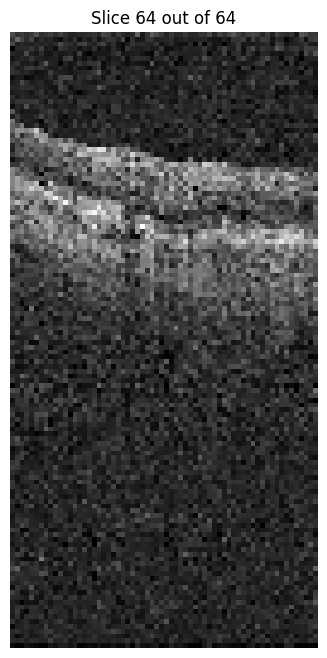

In [29]:
from IPython.display import clear_output
array = np_array_data[388]

# Display axial view 
for i in range(array.shape[0]):
    slice_num = i
    slice = array[slice_num]
    plt.figure(figsize=(8, 8))
    plt.imshow(slice, cmap='gray')
    plt.title(f"Slice {slice_num+1} out of {array.shape[0]}")
    plt.axis('off')
    plt.show()
    time.sleep(0.3)
    clear_output(wait=True)



In [ ]:
def retina(self):
        path = "glaucoma_oct_data/retina-oct-glaucoma/retina-oct-glaucoma/imagesTr"
        json_path = "glaucoma_oct_data/retina-oct-glaucoma/retina-oct-glaucoma/dataset.json"
        
        # Load JSON label info
        with open(json_path, "r") as f:
            metadata = json.load(f)
            label_data = metadata["training"]

        # Create a filename-to-label map
        label_data[i]['image'][11:20]
        label_map = {}
        for entry in label_data:
            filename = os.path.basename(entry["image"])
            label = entry["POAG"]
            label_map[filename] = label

        # Prepare outputs
        images = []
        np_arrays = []
        labels = []

        # Iterate through files and match with label
        for filename in os.listdir(path):
            if filename.endswith(".mha"):
                full_path = os.path.join(path, filename)

                # Only proceed if this image has a label
                if filename in label_map:
                    image = sitk.ReadImage(full_path)
                    array = sitk.GetArrayFromImage(image)

                    images.append(image)
                    np_arrays.append(array)
                    labels.append(label_map[filename])
                else:
                    print(f"Warning: No label found for {filename}")
            else:
                print("non-mha object found:", filename)

        return images, np_arrays, labels

'POAG_0495'